## Astrometry measurement of Mira variable SY Sculptoris

https://academic.oup.com/pasj/article/63/1/63/1459044

Observed astronomy values used can be found in the SIMBAD database   
http://simbad.u-strasbg.fr/simbad/sim-basic?Ident=SY+Scl&submit=SIMBAD+search

In [1]:
# local install includes
local_venv = '/udd0/litterbox/venv/bin/activate_this.py'
execfile(local_venv, dict(__file__=local_venv))

%matplotlib inline
import numpy as np
from astropy import units as u
import astropy.coordinates as coords

In [2]:
RA = '00h07m36.24756s'
DEC = '-25d29m40.02813s'
parallax = 0.6751  # mas
proper_motion = (6.111, -7.475)  # mas/yr GAIA (DR2)
radial_velocity = 24.  # km/s

The distance D in pc comes from the parallax (measured in arcseconds)   
$D = 1/\pi$

The transverse velocity of a star (in km/s) is related to the proper motion $\mu$ (in arcsec / year) and the distance D (in pc) as   
$V = 4.74\mu D$

In [3]:
distance = 1./parallax # pc
print "SY Scl's annual parallax is %.2f [mas], corresponding to a distance of %.2f [kpc]" \
      % (parallax, distance)
    
parallax = parallax*u.mas # mas = milli-arcseconds
distance = (parallax).to(u.kpc, u.parallax())

print 'Annual parallax is {}, corresponding to a distance of {}'.format(
      parallax,
      distance)

SY Scl's annual parallax is 0.68 [mas], corresponding to a distance of 1.48 [kpc]
Annual parallax is 0.6751 mas, corresponding to a distance of 1.48126203525 kpc


The position on the sky can be converted from celestial coordinates
(right ascension, $\alpha$ and declination, $\delta$) to galactic coordinates ($l,b$)
via a spherical trigonometric transformation.

In [4]:
SYScl = coords.SkyCoord(RA, DEC,
                        distance=distance,
                        frame='icrs',
                        unit=(u.hourangle, u.deg)) # “J2000” coordinates
print SYScl
SYScl_gal = SYScl.transform_to(coords.Galactic)
print SYScl_gal
l = SYScl_gal.l.rad
b = SYScl_gal.b.rad
print l, b

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (1.9010315, -25.49445226, 1.48126204)>
<SkyCoord (Galactic): (l, b, distance) in (deg, deg, kpc)
    (39.91154092, -80.04540217, 1.48126204)>
0.696587798639 -1.39705581901


Transform Heliocentric sky positions, distance, proper motions, and radial velocities to a Galactocentric, Cartesian frame.   
This frame requires specifying the Sun-Galactic center distance, and optionally the height of the Sun above the Galactic midplane.

Most of the nearby stars in the Galaxy belong to the disk.
The mid-plane of this disk is the Galactic plane, and it is used to define a system of
**Galactic coordinates** ($l,b$) where $l$ is the **Galactic longitude** (angle along the plane)
and $b$ is the **Galactic latitude** (angle above the plane).

**Astropy defaults**   
We use default values from Schönrich et al. (2010) for the barycentric velocity relative to the LSR, which is defined in Galactic (right-handed) cartesian velocity components   
$(U,V,W)=(11.1,12.24,7.25)$ km s−1.

In [5]:
v_bary = SYScl.transform_to(coords.LSR).v_bary
Usun, Vsun, Wsun = np.asarray(v_bary.d_xyz.value)
print Usun, Vsun, Wsun

11.1 12.24 7.25


In [6]:
# vlsr = vbsr + (Usun*cos(l)*cos(b) + Vsun*sin(l)*cos(b) + Wsun*sin(b)
Vr = radial_velocity - (Usun * np.cos(l) * np.cos(b) +
                        Vsun * np.sin(l) * np.cos(b) +
                        Wsun * np.sin(b))

In [7]:
SYScl = coords.ICRS(RA, DEC,
                   distance=distance,
                   pm_ra_cosdec=proper_motion[0]*(u.mas/u.yr),
                   pm_dec=proper_motion[1]*(u.mas/u.yr),
                   radial_velocity=radial_velocity*(u.km/u.s))
print SYScl

<ICRS Coordinate: (ra, dec, distance) in (deg, deg, kpc)
    (1.9010315, -25.49445226, 1.48126204)
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    (6.111, -7.475, 24.)>


In [8]:
SYScl_galactic = SYScl.transform_to(coords.Galactic)
print SYScl_galactic
print SYScl_galactic.transform_to(coords.Galactocentric)

<Galactic Coordinate: (l, b, distance) in (deg, deg, kpc)
    (39.91154092, -80.04540217, 1.48126204)
 (pm_l_cosb, pm_b, radial_velocity) in (mas / yr, mas / yr, km / s)
    (-6.06088628, -7.51569049, 24.)>
<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, 232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in kpc
    (-8.10829182, 0.16429268, -1.43259239)
 (v_x, v_y, v_z) in km / s
    (1.61133111, 168.90739857, -25.48106277)>


In [9]:
#Vlsr=22*u.km/u.s
#Vl=-38.5*u.km/u.s
#Vb=-43.1*u.km/u.s

[Vl, Vb] = (4.74047 * np.asarray([SYScl_galactic.pm_l_cosb.value, SYScl_galactic.pm_b.value]) * distance.value)  # [km/s]
print 'Proper motion of ({:.2f},{:.2f}) [mas/yr]'.format(proper_motion[0], proper_motion[1])
print 'corresponds to a velocity vector ({:.2f}, {:.2f}, {:.2f}) [km/s]'.format(Vl, Vb, Vr)
print 'at the source distance of {:.2f} [pc]'.format(distance.value)

Proper motion of (6.11,-7.47) [mas/yr]
corresponds to a velocity vector (-42.56, -52.77, 28.31) [km/s]
at the source distance of 1.48 [pc]


For any given star with a parallax measurement, we can determine its (X, Y, Z) position in space

The distance and position on the sky is converted to the cartesian system of Galactic coordinates (X,Y,Z).   
$X = R_{sun} − D \cos(b)\cos(l)$    
$Y = D \cos(b)\sin(l)$      
$Z = D \sin(b)$

Physically, X is the direction toward the Galactic center, Y is the direction of Galactic rotation and Z is the direction perpendicular out of the Galactic plane.

In [10]:
SYScl.representation = 'cartesian'
print SYScl

<ICRS Coordinate: (x, y, z) in kpc
    (1.33629118, 0.04435343, -0.63757029)
 (v_x, v_y, v_z) in km / s
    (-2.35223925, 42.85625816, -57.70774487)>


In [11]:
SYScl_galactic = SYScl.transform_to(coords.Galactic)
print SYScl_galactic
print SYScl_galactic.transform_to(coords.Galactocentric)

<Galactic Coordinate: (l, b, distance) in (deg, deg, kpc)
    (39.91154092, -80.04540217, 1.48126204)
 (pm_l_cosb, pm_b, radial_velocity) in (mas / yr, mas / yr, km / s)
    (-6.06088628, -7.51569049, 24.)>
<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, 232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in kpc
    (-8.10829182, 0.16429268, -1.43259239)
 (v_x, v_y, v_z) in km / s
    (1.61133111, 168.90739857, -25.48106277)>


In [12]:
R0 = 8  # kpc distance from the Galactic center to the Sun

l = SYScl_gal.l.rad  # galactic longitude
b = SYScl_gal.b.rad  # galactic latitude
X =  distance * np.cos(l) * np.cos(b) 
Y =  distance * np.sin(l) * np.cos(b) 
Z =  distance * np.sin(b)
SYScl_cartesian = [(R0*1e3) - X.value, Y.value, Z.value]
print 'Position of SY Scl in the Cartesian coordinate system', np.asarray(SYScl_cartesian), '[kpc]'

Position of SY Scl in the Cartesian coordinate system [ 7.99980359e+03  1.64290715e-01 -1.45896170e+00] [kpc]


In [13]:
R0 = 8*u.kpc
V0 = 217.4*u.km/u.s
v_sun = coords.CartesianDifferential([0., 217.4, 0.]*u.km/u.s)
gc_frame = coords.Galactocentric(galcen_distance=R0,
                                 galcen_v_sun=v_sun,
                                 z_sun=0*u.pc)

#v_sun = coords.CartesianDifferential([10.0, 5.2+V0.value, 7.2]*u.km/u.s)
#gc_frame = coords.Galactocentric(galcen_distance=R0.to(u.kpc),
#                                 galcen_v_sun=v_sun,
#                                 z_sun=0*u.pc)

SYScl_frame = SYScl_galactic.transform_to(gc_frame)
print SYScl_frame
SYScl_frame.representation= 'cartesian'
print SYScl_frame

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.0 kpc, galcen_v_sun=(0., 217.4, 0.) km / s, z_sun=0.0 pc, roll=0.0 deg): (x, y, z) in kpc
    (-7.80358868, 0.16429268, -1.45896118)
 (v_x, v_y, v_z) in km / s
    (-9.38214414, 154.06739857, -32.76175634)>
<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.0 kpc, galcen_v_sun=(0., 217.4, 0.) km / s, z_sun=0.0 pc, roll=0.0 deg): (x, y, z) in kpc
    (-7.80358868, 0.16429268, -1.45896118)
 (v_x, v_y, v_z) in km / s
    (-9.38214414, 154.06739857, -32.76175634)>


In [14]:
SYScl_galactocentric = SYScl.transform_to(coords.Galactocentric)
print SYScl_galactocentric

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, 232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in kpc
    (-8.10829182, 0.16429268, -1.43259239)
 (v_x, v_y, v_z) in km / s
    (1.61133111, 168.90739857, -25.48106277)>


From proper motion and radial velocity measurements, galactic coordinates can also be converted to the Galactic velocities (U,V,W).   
$U = V_R \cos(l)\cos(b) − V_l\sin(l) − V_b\cos(l)\sin(b)$      
$V = V_R \sin(l)\cos(b) + V_l\cos(l) − V_b\sin(l)\sin(b)$      
$W = V_R \sin(b) + V_b\cos(b)$    
where $V_l$ is the velocity of the star along the direction of increasing Galactic latitude and $V_b$ is the velocity along the direction of increasing Galactic longitude.
Physically, $U$ points to the galactic center, $V$ points in the direction of the galactic rotation and $W$ points to the northern galactic pole.

In [15]:
SYScl_galactic.representation = 'cartesian'
print SYScl_galactic

<Galactic Coordinate: (u, v, w) in kpc
    (0.19640908, 0.16429071, -1.4589617)
 (U, V, W) in km / s
    (-9.38213212, -63.33265827, -32.76164988)>


In [16]:
U =  Vr * np.cos(l) * np.cos(b) - Vl * np.sin(l) - Vb * np.cos(l) * np.sin(b)
V =  Vr * np.sin(l) * np.cos(b) + Vl * np.cos(l) - Vb * np.sin(l) * np.sin(b)
W =  Vr * np.sin(b) + Vb * np.cos(b)

SYScl_motion = [U, V, W]
print 'Peculiar motion with respect to LSR', np.asarray(SYScl_motion), '[km/s]'

Peculiar motion with respect to LSR [ -8.81044853 -62.85445548 -37.00820759] [km/s]


**Milky Way Structure**   
SPIRAL galaxies have fast rotating, flattened disks, and contain some gas and dust.   
The three major structural elements of the Milky Way are the disk, bulge and stellar halo.   
 - A thin disk consisting of stars of all ages from 0 to 10 Gyr. The disk also contains gas and dust which is closely confined to the central plane and contains regions of active star formation
 - A bulge of older stars
 - An extended stellar halo of very old stars.  The stellar halo comprises only a few percent of the visible mass

The stars in the disk have an exponential distribution of surface brightness (light flux per unit surface area)   
$I(R) = I_0 \exp(-R/R_d)$   
where $I_0$ is the central sufrace brightness of the disk, $R_d$ is called the disk scale length and is about 2.4 +/- 1 kpc (1 kpc = 1000 pc and 1 pc = 3.26 light years = $3.085678 x 10^{18}$cm).

The Sun is located at a distance $R_0$ from the galactic center, and is assumed to be approximatley 8 kpc from the center.

The disk of the Galaxy rotates and this prevents it from collapsing into the Galactic center.  Various determinations of $V_{rot}$  give values between 190 and 250 km/sec. The rotation speed at the Sun $V_{rot}$ = 217.4 km/sec is most commonly used.

For the Sun we use the radial velocity $V_r$=22 km/s, circular velocity $V_0$=220 in km/s and distance to the Galactic center $R_0$=8.0 in kpc, (e.g., 2012ApJ...759..131B).

In [17]:
import matplotlib.pylab as plt
from galpy.orbit import Orbit
import galpy

**Milky Way potential model**   
MWPotential2014 is a simplified potential model based on the model developed by Bovy and
Rix (2013)[9]. MWPotential2014 combines several established models for different regions
of the Milky Way: the bulge is defined using a simple power-law density profile, the disk
using the Miyamoto-Nagai potentiall[49], and the dark-matter halo using the Navarro, Frenk, and
White (NFW) (1995) model[52]. Each region and their contributions to galactic potential
are described in this section

* [9] Bovy Jo, and Hans-Walter Rix, A Direct Dynamical Measurement of the Milky Way’s
Disk Surface Density Profile, Disk Scale Length, and Dark Matter Profile at 4 kpc < R
< 9 kpc The American Astronomical Society, December 2nd, 2013.
* [49] Miyamoto M. and Ryuzaburo Nagai, Three-Dimensional Models for the Distribution of
Mass in Galaxies, Astron. Soc. Japan 27, 533-543, 1975.
* [52] Navarro Julio F., Carlos S. Frenk, and Simon D.M. White, The Structure of Cold Dark
Matter Halos, Astrophys.J.462:563-575, 1996.

[<galpy.potential_src.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x7f498ecc1610>, <galpy.potential_src.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x7f498ecc1650>, <galpy.potential_src.TwoPowerSphericalPotential.NFWPotential object at 0x7f498ecc1690>]


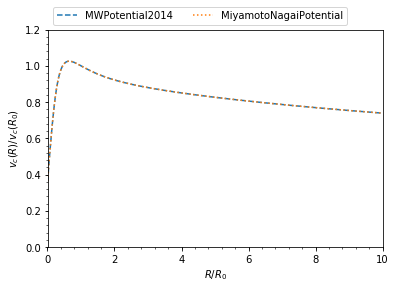

In [18]:
MWPotential2014=galpy.potential.MWPotential2014
print MWPotential2014

bp= galpy.potential.PowerSphericalPotentialwCutoff(alpha=1.8,rc=0.2375,normalize=0.05)
mp= galpy.potential.MiyamotoNagaiPotential(a=0.375,b=0.035,normalize=.6)
nnp= galpy.potential.NFWPotential(a=2.0,normalize=.35)
mwp= [bp,mp,nnp]

from galpy.potential import plotRotcurve
plotRotcurve(galpy.potential.MWPotential2014,
             Rrange=[0.01, 10.],
             grid=1001,
             yrange=[0., 1.2],
             label='MWPotential2014',
             linestyle='--')
plotRotcurve([bp, mp, nnp],
             Rrange=[0.01, 10.],
             grid=1001,
             overplot=True,
             label='MiyamotoNagaiPotential',
             linestyle=':')

plt.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=2, numpoints=1);

In [19]:
#ts= np.linspace(0,1.,10000)*u.Gyr
ts= np.linspace(0,10.,10000)*u.Gyr

### The Sun
The Sun is located at a distance $R_0$ from the galactic center, and is assumed to be approximatley 8 kpc from the center.

The disk of the Galaxy rotates and this prevents it from collapsing into the Galactic center.  Various determinations of $V_{rot}$  give values between 190 and 250 km/sec. The rotation speed at the Sun $V_{rot}$ = 217.4 km/sec is most commonly used.

Estimate the period of the Sun's orbit around the Galactic Center in the following way:   
$P^2 = (4\pi^2 x a^3) / G(m1 + m2)$
 - Assume the Sun is following a circular orbit with radius 8,000 parsecs.
 - Calculate the circumference of the Sun's orbit:   
 $c = 2πr = (2π)*(8000 pc)*(3.1 x 10^{13} km/pc) = 1.6 x 10^{18} km$
 - calculate the period of the orbit by taking the circumference and dividing by the velocity:
 $P = 1.6 x 10^{18} km / 200 km/sec = 8.0 x 10^{15} sec ≈ 250 million years$.
 
orbital period (P) = orbit circumference (2πr) / orbital velocity (v)

For the Sun we use the radial velocity $V_r$=22 km/s, circular velocity $V_0$=220 in km/s and distance to the Galactic center $R_0$=8.0 in kpc, (e.g., 2012ApJ...759..131B).

In three dimensions initial conditions are given as Galactocentric cylindrical coordinates ```[R,vR,vT(,z,vz,phi)]```, where one can choose not to specify the azimuth of the orbit ```vxvv=[R,vR,vT,z,vz]```.   
```Sol_orbit = Orbit(vxvv=[8.*u.kpc, 22.*u.km/u.s, 220*u.km/u.s, 0.*u.kpc, 22.*u.km/u.s, 0.*u.deg])```

Galactocentric cylindrical coordinate frame by assuming a Solar motion that can be specified as either ```solarmotion=hogg``` (default; 2005ApJ...629..268H), ```solarmotion=dehnen``` (1998MNRAS.298..387D) or ```solarmotion=schoenrich``` (2010MNRAS.403.1829S).

In [20]:
Sol = coords.Galactocentric()
print Sol
Sol_orbit = Orbit(vxvv=[Sol.galcen_distance,
                        Sol.galcen_v_sun.d_x,
                        Sol.galcen_v_sun.d_y,
                        Sol.z_sun,
                        Sol.galcen_v_sun.d_z,
                        0.*u.deg])
Sol_orbit.flip(inplace=True) # velocities are minus the original velocities; useful for quick backward integration

<Galactocentric Frame (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, 232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg)>


In [21]:
Sol_orbit.integrate(ts, MWPotential2014, method='rk4_c')
print Sol_orbit.getOrbit()

[[ 1.03750000e+00 -5.04545455e-02 -1.05563636e+00  3.37500000e-03
  -3.29545455e-02  0.00000000e+00]
 [ 1.03612773e+00 -4.71079778e-02 -1.05703447e+00  2.43988961e-03
  -3.35073901e-02  6.25452788e+00]
 [ 1.03485064e+00 -4.36878331e-02 -1.05833894e+00  1.49171067e-03
  -3.38830134e-02  6.22579708e+00]
 ...
 [ 1.06356649e+00 -8.61695182e-02 -1.02976422e+00  1.33738595e-02
  -3.53279607e-03  2.06207046e+00]
 [ 1.06117108e+00 -8.41369064e-02 -1.03208874e+00  1.32428821e-02
  -5.77923737e-03  2.03477529e+00]
 [ 1.05883449e+00 -8.19869609e-02 -1.03436631e+00  1.30488596e-02
  -8.01394257e-03  2.00735812e+00]]


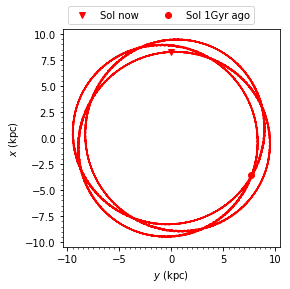

In [22]:
Sol_orbit.plot(d1='y', d2='x', color='r', linestyle=':')

#plt.errorbar(Sol_orbit.y(ts), Sol_orbit.x(ts), yerr=2, xerr=2, fmt=',', color='r', ecolor='gray')


plt.plot(Sol_orbit.y(ts)[0], Sol_orbit.x(ts)[0], 'rv', label='Sol now')
plt.plot(Sol_orbit.y(ts)[-1], Sol_orbit.x(ts)[-1], 'ro', label='Sol 1Gyr ago')

plt.axis('square')
plt.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=2, numpoints=1);

One can also initialize orbits from Galactic coordinates using ```o= Orbit(vxvv=[glon,glat,distance,pmll,pmbb,Vlos],lb=True)```, where ```glon``` and ```glat``` are Galactic longitude and latitude expressed in degrees, the distance is expressed in kpc, proper motions are given in mas/yr $[pmll = pmll’ * \cos(glat)]$, and $Vlos$ is the heliocentric line-of-sight velocity given in km/s. 

In [23]:
R0 = Sol.galcen_distance
V0 = Sol.galcen_v_sun.d_y - v_bary.d_y
print R0, V0

SYScl_gal = SYScl.transform_to(coords.Galactic)
print SYScl_gal
target_orbit= Orbit(vxvv=[SYScl_gal.l,  # The Galactic longitude for this object
                          SYScl_gal.b,  # The Galactic latitude for this object
                          SYScl_gal.distance,   # The Distance for this object along the line-of-sight
                          SYScl_gal.pm_l_cosb,  # The proper motion in Galactic longitude
                          SYScl_gal.pm_b,       # The proper motion in Galactic latitude for this object
                          SYScl_gal.radial_velocity],
                    solarmotion='dehnen',
                    lb=True,
                    ro=R0,
                    vo=V0)
target_orbit.flip(inplace=True) # velocities are minus the original velocities; useful for quick backward integration

print SYScl_galactic
uvwtgt_orbit= Orbit(vxvv=[SYScl_gal.l,
                          SYScl_gal.b,
                          SYScl_gal.distance,
                          SYScl_galactic.U,
                          SYScl_galactic.V,
                          SYScl_galactic.W],
                    solarmotion='dehnen',
                    lb=True, uvw=True,
                    ro=R0,
                    vo=V0)
uvwtgt_orbit.flip(inplace=True) # velocities are minus the original velocities; useful for quick backward integration


print SYScl_galactocentric
xyztgt_orbit = Orbit(vxvv=[SYScl_galactocentric.x,
                           SYScl_galactocentric.v_x,
                           SYScl_galactocentric.v_y,
                           SYScl_galactocentric.z,
                           SYScl_galactocentric.v_z,
                        0.*u.deg])
xyztgt_orbit.flip(inplace=True) # velocities are minus the original velocities; useful for quick backward integration

8.3 kpc 220.0 km / s
<Galactic Coordinate: (l, b, distance) in (deg, deg, kpc)
    (39.91154092, -80.04540217, 1.48126204)
 (pm_l_cosb, pm_b, radial_velocity) in (mas / yr, mas / yr, km / s)
    (-6.06088628, -7.51569049, 24.)>
<Galactic Coordinate: (u, v, w) in kpc
    (0.19640908, 0.16429071, -1.4589617)
 (U, V, W) in km / s
    (-9.38213212, -63.33265827, -32.76164988)>
<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, 232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in kpc
    (-8.10829182, 0.16429268, -1.43259239)
 (v_x, v_y, v_z) in km / s
    (1.61133111, 168.90739857, -25.48106277)>


In [24]:
target_orbit.integrate(ts, MWPotential2014, method='rk4_c')
uvwtgt_orbit.integrate(ts, MWPotential2014, method='rk4_c')
xyztgt_orbit.integrate(ts, MWPotential2014, method='rk4_c')

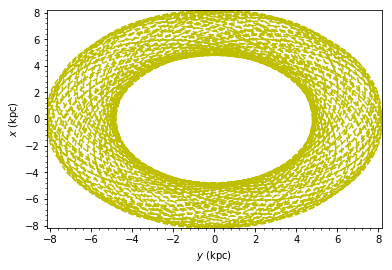

In [25]:
target_orbit.plot(d1='y', d2='x', color='y', linestyle='--')

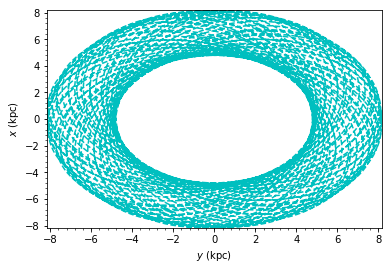

In [26]:
uvwtgt_orbit.plot(d1='y', d2='x', color='c', linestyle='--')

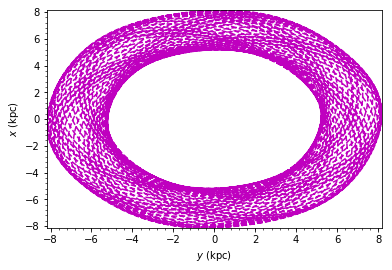

In [27]:
xyztgt_orbit.plot(d1='y', d2='x', color='m', linestyle='--')